# Exercice 1
1) Combien y a t'il de dominos dans un jeu classique ?  
Un jeu de dominos classique est composé de 28 pièces dont chaque moitié comporte un certain nombre de petits points allant de 0 à 6, sans doublons, ce qui donne 7 * 4 = 28 pièces.

2) Pourquoi est-il possible que le jeu s'arrête sans avoir posé tous les dominos ?  
Il est possible que le jeu s'arrete avant d'avoir posé tout les dominos car chaque moitié comporte un certain nombre de petits points allant de 0 à 6. Si les combinaisons de dominos disponibles dans la pioche ne sont pas compatibles avec les extrémités de la chaîne déjà construite, le jeu peut se terminer sans avoir posé tous les dominos. Cela dépend de la chance et de l'ordre dans lequel les dominos sont tirés.

3) Pourquoi X et Y sont des variables aléatoires ?  
X et Y sont des variables aléatoires car leur valeur dépend du hasard et des choix effectués tout au long du jeu. La variable aléatoire X représente le nombre de dominos posés dans la chaîne, et elle dépend du nombre de dominos tirés et de la possibilité de les placer à chaque étape. De même, la variable aléatoire Y représente le nombre de points restants dans la pioche, ce qui dépend également de la manière dont les dominos sont tirés et placés. En raison de la nature aléatoire du jeu, X et Y prennent des valeurs différentes à chaque partie, d'où leur caractère aléatoire. Pour comprendre leur comportement, il est nécessaire d'étudier leur distribution de probabilité.

- Quelle structure de données pour représenter la pioche de dominos restants ?
    - La structure nécéssaire est une file car on insere en queue mais on supprime en tete
- Quelle structure de données pour représenter la chaîne de dominos déjà construite? (Sachant qu'il suffit de considérer l'information pertinente pour le déroulement du jeu.)
    - Une liste car c'est une fassons simple de stocker les dominos mis en place sur le tapis
- Comment savoir si le jeu est fini ?
    - si on ne peut plus inserer en tete ou en queue les dominos de la pioche.
- Est-il éventuellement utile d'écrire certaines sous-fonctions, afin de clarifier le code ?  
Ca peut être plus simple à comprendre le code, notamment pour le comptage de Y.

exemple de file en python :

In [10]:
queue = []                 # la file est vide

queue.append(1)            # la file contient [1]
queue.append(2)            # la file contient [1, 2]
queue.append(3)            # la file contient [1, 2, 3]

result = queue.pop(0)      # la file contient [2, 3]

print(result)
print(queue)

1
[2, 3]


**Initialisation et affichage de la pioche**

In [11]:
import random

# initialisation de la pioche contenant 28 pièces
pioche = [[i, j] for i in range(1,7) for j in range(i, 7)]

# Exemple d'utilisation : affichez la file de dominos
for domino in pioche:
    print(domino)

[1, 1]
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[2, 2]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[3, 3]
[3, 4]
[3, 5]
[3, 6]
[4, 4]
[4, 5]
[4, 6]
[5, 5]
[5, 6]
[6, 6]


In [12]:
def comptePoints(P):
    # Initialise un compteur pour les points
    nb = 0
    
    # Parcours tous les dominos de la liste
    for domino in P:
        # Ajoute les points des deux moitiés du domino
        nb += sum(domino)
    
    return nb

In [13]:
# Fonction pour simuler une partie du jeu de dominos
def une_chaine_domino():
    # Liste représentant les dominos sur le jeu
    tapis = []

    #initialisation d'une variable pour compter le nombre de pioche dans la pioche
    cpt = 0
    
    # Liste représentant la pioche de dominos restants
    pioche = [(i, j) for i in range(1, 7) for j in range(i, 7)]

    # Tant que la pioche n'est pas vide et qu'on peut poser des dominos
    while pioche:
        domino = random.choice(pioche)  # Tirer un domino au hasard
        pioche.remove(domino)  # Retirer le domino de la pioche

        if not tapis:  # Si c'est le premier domino, ajoutez-le directement
            tapis.append(domino)
        else:
            # Vérifiez si le domino peut être placé à l'une des extrémités de la chaîne
            if domino[0] == tapis[0][0] or domino[1] == tapis[0][0]:
                tapis.insert(0, domino)  # Placez-le au début de la chaîne
                cpt = 0;
            elif domino[0] == tapis[0][1] or domino[1] == tapis[0][1]: # On regarde le second argument du premier couple du tapis
                tapis.append(domino)  # Placez-le à la fin de la chaîne
                cpt = 0;
            else:
                pioche.append(domino)
                cpt = cpt + 1;
                if(cpt > len(pioche)):
                    break  # Si après un tour entier de la pioche est éfféctué sans pour voir placer un domino

    # Valeur de X : nombre de dominos posés dans la chaîne
    X = len(tapis)

    # Valeur de Y : nombre de points restants dans la pioche
    Y = comptePoints(pioche)

    return X, Y

# Utilisation de la fonction
X, Y = une_chaine_domino()
print(f"X = {X}, Y = {Y}")

X = 13, Y = 70


# Exercice 3 (Analyse probabiliste).  
Simulez un grand nombre de réalisations du jeu (au moins 10000).  
Puis, à l'aide des méthodes déjà vues en cours et en TP :

In [14]:
# Nombre de réalisations du jeu
nombre_de_realisations = 10000

# Liste pour stocker les résultats des n réalisations
resultats = []

# Simulez le jeu un grand nombre de fois et stockez les résultats
for _ in range(nombre_de_realisations):
    X, Y = une_chaine_domino()
    resultats.append((X, Y))

# Vous pouvez maintenant analyser les résultats pour obtenir des statistiques
# Par exemple, vous pouvez calculer la moyenne et l'écart-type pour X et Y.
moyenne_X = sum(X for X, Y in resultats) / nombre_de_realisations
moyenne_Y = sum(Y for X, Y in resultats) / nombre_de_realisations

# Affichez les résultats statistiques
print(f"Moyenne de X : {moyenne_X}")
print(f"Moyenne de Y : {moyenne_Y}")

Moyenne de X : 14.9434
Moyenne de Y : 47.56


1. Estimer et représenter la loi de probabilité de la variable X.
2. Calculer et tracer la fonction de répartition de X.
3. Estimer l'espérance de X.
4. Estimer la variance de X.
5. Mêmes questions pour la variable Y .
6. Estimer la probabilité de succès au jeu, c'est-à-dire, la probabilité de parvenir à placer tous
les dominos dans la chaine.
7. Estimer le nombre médian de points restants dans la pioche.

Pour répondre à ces questions, vous pouvez utiliser les résultats de votre simulation du jeu de dominos pour estimer les propriétés des variables aléatoires X et Y. Voici comment vous pouvez procéder pour chaque question :

1. Estimer et représenter la loi de probabilité de la variable X :
   Pour estimer la loi de probabilité de X, comptez le nombre de fois où chaque valeur de X apparaît dans vos résultats et divisez-le par le nombre total de réalisations. Vous pouvez ensuite représenter cette distribution de probabilité sous forme d'histogramme.

2. Calculer et tracer la fonction de répartition de X :
   Pour calculer la fonction de répartition (CDF) de X, triez d'abord les valeurs de X dans l'ordre croissant, puis calculez la proportion de réalisations avec des valeurs de X inférieures ou égales à chaque valeur donnée.

3. Estimer l'espérance de X :
   L'espérance de X (la moyenne) peut être estimée en calculant la moyenne des valeurs de X dans vos résultats.

4. Estimer la variance de X :
   Pour estimer la variance de X, calculez la variance des valeurs de X dans vos résultats. Vous pouvez également estimer l'écart-type en prenant la racine carrée de la variance.

5. Mêmes questions pour la variable Y :
   Utilisez la même approche que pour X pour estimer et représenter la loi de probabilité de Y, calculer et tracer la fonction de répartition de Y, estimer l'espérance de Y et la variance de Y.

6. Estimer la probabilité de succès au jeu :
   La probabilité de succès au jeu est le rapport du nombre de réalisations où X est égal au nombre total de dominos dans un jeu (28) par le nombre total de réalisations.

7. Estimer le nombre médian de points restants dans la pioche :
   Pour estimer le nombre médian de points restants dans la pioche, triez d'abord les valeurs de Y dans l'ordre croissant et trouvez la médiane.

# Exercice 4 (Covariance et corrélation) :

1. Pour effectuer 200 réalisations du jeu, vous pouvez utiliser votre fonction `une_chaine_domino` pour obtenir les valeurs de X et Y. Ensuite, vous pouvez représenter ces valeurs sous la forme d'un nuage de points en utilisant la bibliothèque Matplotlib. Voici comment vous pouvez le faire :

   ```python
   import matplotlib.pyplot as plt

   # Effectuer 200 réalisations du jeu
   nombre_de_realisations = 200
   resultats = [une_chaine_domino() for _ in range(nombre_de_realisations)]

   # Extraire les valeurs de X et Y dans des listes distinctes
   X_valeurs = [X for X, Y in resultats]
   Y_valeurs = [Y for X, Y in resultats]

   # Créer un nuage de points
   plt.figure(figsize=(8, 6))
   plt.scatter(X_valeurs, Y_valeurs, alpha=0.5)
   plt.title('Nuage de points de X et Y')
   plt.xlabel('Valeurs de X')
   plt.ylabel('Valeurs de Y')
   plt.grid(True)
   plt.show()
   ```

   L'interprétation du nuage de points peut vous permettre de visualiser s'il existe une relation entre les valeurs de X et Y.

2. Le nombre Z = X * Y est une variable aléatoire car il dépend des variables aléatoires X et Y. Tant que X et Y sont des variables aléatoires, toute combinaison linéaire de celles-ci est également une variable aléatoire.

3. Pour estimer l'espérance de X, Y et Z, vous pouvez calculer la moyenne des valeurs observées dans vos réalisations. Pour vérifier l'indépendance de X et Y, vous pouvez calculer la covariance de X et Y. Si la covariance est proche de zéro, cela suggère que X et Y sont indépendants. Pour le calcul de la covariance, vous pouvez utiliser la fonction `np.cov` de NumPy.

   ```python
   esperance_X = np.mean(X_valeurs)
   esperance_Y = np.mean(Y_valeurs)

   # Calcul de Z = X * Y pour chaque réalisation
   Z_valeurs = [X * Y for X, Y in resultats]
   esperance_Z = np.mean(Z_valeurs)

   # Calcul de la covariance entre X et Y
   covariance_XY = np.cov(X_valeurs, Y_valeurs)[0, 1]

   # Vérification d'indépendance
   independants = abs(covariance_XY) < 1e-10
   ```

4. Pour estimer la covariance des variables X et Y, vous pouvez utiliser la valeur `covariance_XY` calculée précédemment. Pour le coefficient de corrélation, vous pouvez diviser la covariance par le produit des écarts-types de X et Y. Le coefficient de corrélation mesure la force et la direction de la relation linéaire entre les variables. Un coefficient de corrélation proche de 1 ou -1 indique une forte corrélation, tandis qu'un coefficient proche de 0 indique une faible corrélation.

   ```python
   ecart_type_X = np.std(X_valeurs)
   ecart_type_Y = np.std(Y_valeurs)
   coefficient_correlation = covariance_XY / (ecart_type_X * ecart_type_Y)
   ```

   Vous pouvez commenter sur la signification du coefficient de corrélation : s'il est proche de 1 ou -1, cela indique une forte corrélation linéaire entre X et Y, tandis qu'un coefficient proche de 0 indique une faible corrélation.

Ces étapes vous permettront d'explorer la relation entre les variables X, Y et Z, d'estimer leurs espérances, de vérifier l'indépendance de X et Y, et de calculer la covariance et le coefficient de corrélation entre X et Y.

1) Effectuer 200 réalisations du jeu et représenter les valeurs correspondantes de X et Y sous la forme d'un nuage de points (avec un point (x,y) pour chaque réalisation de X et Y observée). Interprétez le résultat.

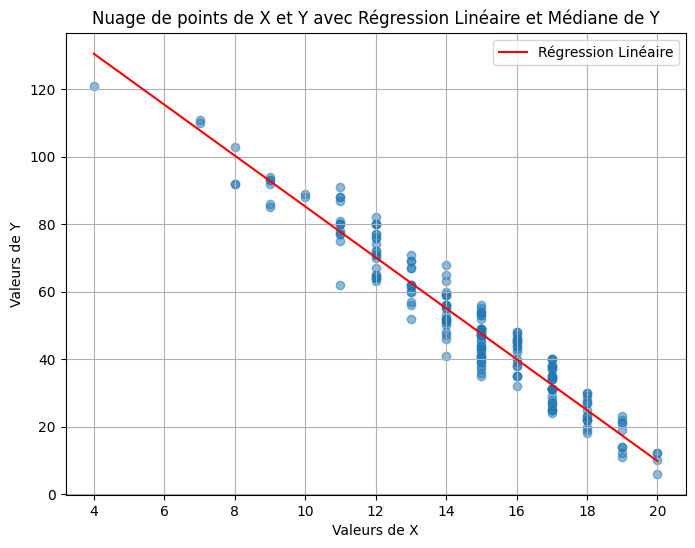

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# ... (votre code pour obtenir X_valeurs et Y_valeurs)
# Effectuer 200 réalisations du jeu
nombre_de_realisations = 200
resultats = [une_chaine_domino() for _ in range(nombre_de_realisations)]

# Extraire les valeurs de X et Y dans des listes distinctes
X_valeurs = [X for X, Y in resultats]
Y_valeurs = [Y for X, Y in resultats]

# Ajuster une régression linéaire aux points
coefficients = np.polyfit(X_valeurs, Y_valeurs, 1)
slope, intercept = coefficients

# Créer un nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(X_valeurs, Y_valeurs, alpha=0.5)

# Tracer la droite de régression linéaire
x_range = np.linspace(min(X_valeurs), max(X_valeurs), 100)
y_fit = slope * x_range + intercept
plt.plot(x_range, y_fit, color='red', label=f'Régression Linéaire')

plt.title('Nuage de points de X et Y avec Régression Linéaire et Médiane de Y')
plt.xlabel('Valeurs de X')
plt.ylabel('Valeurs de Y')
plt.legend()
plt.grid(True)
plt.show()


2) On définit le nombre Z = X × Y comme le produit entre X et Y . Expliquer pourquoi Z est une variable aléatoire.

Z est une variable aléatoire car c'est un produit de variables àléatoires

In [34]:
esperance_X = np.mean(X_valeurs)
esperance_Y = np.mean(Y_valeurs)

# Calcul de Z = X * Y pour chaque réalisation
Z_valeurs = [X * Y for X, Y in resultats]
esperance_Z = np.mean(Z_valeurs)

# Calcul de la covariance entre X et Y
covariance_XY = np.cov(X_valeurs, Y_valeurs)[0, 1]

# Vérification d'indépendance
independants = abs(covariance_XY) < 1e-10

print("esperance de X : ", esperance_X)
print("esperance de Y : ", esperance_Y)

print("esperance de Z : ", esperance_Z)

print("covariance de X et Y : ", covariance_XY)

print("X et Y indépendants ? : ", independants)

esperance de X :  14.61
esperance de Y :  50.45
esperance de Z :  675.645
covariance de X et Y :  -61.73819095477388
X et Y indépendants ? :  False


In [38]:
ecart_type_X = np.std(X_valeurs)
ecart_type_Y = np.std(Y_valeurs)
coefficient_correlation = covariance_XY / (ecart_type_X * ecart_type_Y)

print("ecart tyope de X : ", ecart_type_X)
print("ecart tyope de Y : ", ecart_type_Y)
print("coefficient de correlation : ", coefficient_correlation)

ecart tyope de X :  2.8527004749885676
ecart tyope de Y :  22.241121824224606
coefficient de correlation :  -0.9730631729407484
